Detection and Classification Fake news and Superspreaders on social media in the context of covid-19.

Dataset - 1. Fake and Real news dataset from Kaggle(Bisaillon C.)

In [ ]:
#Dont run this cell if you want to use 2nd dataset.
import pandas as pd
#Data should be uploade before using.

df_0 = pd.read_csv('True_New.csv')
df_1 = pd.read_csv('Fake_New.csv')#Reading the data from csv file.

df_0["Label"] = 0 #For true news Label is 0
df_1["Label"] = 1 #For fake news Label is 1
#df_0.shape #To check the quantity of data
#df_0.head()

final_fake_data = df_1[['title','Label']]
final_true_data = df_0[['title','Label']]
final_fake_data = final_fake_data[:5000] # first 5000 data entries
final_true_data = final_true_data[:5000] ## first 5000 data entries

out = final_fake_data.append(final_true_data)
out = out[:10000]
out.shape

out=out.dropna() #To drop blank entries

#out.shape

out_copy = out.copy()

out_new_copy = out_copy.sample(frac=1)
out_new_copy = out_new_copy.reset_index(inplace = False,drop = True)#For shuffling the data
print(out_new_copy)



                                                  title  Label
0      WATCH: Trump Minion Makes HUGE Slip About Who...      1
1     Texas governor approves adoption bill that cri...      0
2     Trump to nominate Juster to be ambassador to I...      0
3      Rice chides Trump for criticism of judges, media      0
4     Trump administration red tape tangles up visas...      0
...                                                 ...    ...
9995   BUSTED: Trump Supporter Used Poll Watcher Cre...      1
9996  Belarus crackdown throws U.S. sanctions relief...      0
9997  Senators grill U.S. education secretary on pro...      0
9998  Trump tweets about Russia probe spark warnings...      0
9999   Ethics Office Just Called Out GOP For Shady S...      1

[10000 rows x 2 columns]


Dataset - 2. CoAid Dataset(Limen C. and Lee D.,2020)

In [ ]:

import pandas as pd
#Reading the data from csv file.
df_0=pd.read_csv('NewsReal1COVID-19.csv')

df_1=pd.read_csv('NewsFake1COVID-19.csv')

df_2=pd.read_csv('NewsReal2COVID-19.csv')

df_3=pd.read_csv('NewsFake2COVID-19.csv')

df_4=pd.read_csv('NewsReal3COVID-19.csv')

df_5=pd.read_csv('NewsFake3COVID-19.csv')

df_6=pd.read_csv('NewsReal4COVID-19.csv')

df_7=pd.read_csv('NewsFake4COVID-19.csv')

#Adding all the data together.

result_fake = pd.concat([df_1,df_3,df_5,df_7], axis=0)
#result_fake.shape
result_real = pd.concat([df_0,df_2,df_4,df_6], axis=0)
#result_real.shape


result_fake['Label'] = '0' #For fake news Label is 0
print(result_fake.shape)
final_fake_data = result_fake[['title', 'Label']]
#final_fake_data.head()

result_real['Label'] = '1' #For true news Label is 1
print(result_real.shape)
final_real_data = result_real[['title', 'Label']]
#final_real_data.head()

out = final_fake_data.append(final_real_data)
#print(out)
#out.shape #To check the quantity of data

out=out.dropna()#To drop blank entries
#out.shape

out_copy = out.copy() #copying of data
#print(out_copy)
#out_copy.shape


out_new_copy = out_copy.sample(frac=1)
out_new_copy = out_new_copy.reset_index(inplace = False,drop = True) #For shuffling the data
print(out_new_copy)


(925, 16)
(4532, 11)
                                                  title Label
0     Monitoring and Evaluation Checklist for K-12 S...     1
1                     How Effective is the Flu Vaccine?     1
2     Thrombosis expert on COVID-19: 'I've never see...     1
3     COVID-19: Possible mechanism for blood clottin...     1
4     Many Seniors With Heart Failure Take 10-plus Meds     1
...                                                 ...   ...
5452           Coronavirus (COVID-19) Media Information     1
5453  Claim that Rep. Alexandria Ocasio-Cortez tweet...     0
5454            Coronavirus vs. allergies: What to know     1
5455  Six ways home-based cardiac rehab keeps patien...     1
5456                                       Publications     1

[5457 rows x 2 columns]


Data pre-processing

In [ ]:
import re
import nltk #library for data processing
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(out_new_copy)):
    re_view = re.sub(r'[^a-zA-Z0-9]', ' ',out_new_copy['title'][i])
    re_view = re_view.lower()
    re_view = re_view.split()
    
    #re_view = [ps.stem(word) for word in re_view if not word in stopwords.words('english')] #comment this line if you want to run Word2Vec.
    re_view = ' '.join(re_view)
    corpus.append(re_view)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Feature Extraction By using Word2Vec and analysis by neural network

In [ ]:

import gensim #First need to install library by using (pip install gensim)
import numpy as np



y = np.asarray(out_new_copy['Label'].astype(str).astype(int))
#print(y)


X = [d.split() for d in corpus]
#Word2Vec model
word2vec_model = gensim.models.Word2Vec(sentences=X, window=10, min_count=1)


word2vec_model.wv.vectors.shape[0]

#word2vec_model.wv.most_similar(['corona'])

6742

In [ ]:
from keras.preprocessing.text import Tokenizer
# For Tokeniztion
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)
#tokenizer.word_index

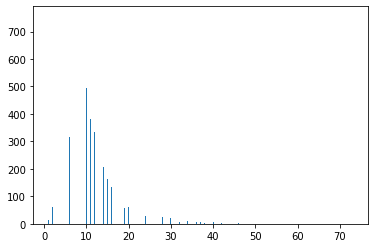

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(x) for x in X],bins = 700) 
plt.show() #Foe checking the value of x

In [ ]:
import numpy as np

nos = np.array([len(x) for x in X])
len(nos[nos>30])


87

In [ ]:
import keras
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X = pad_sequences(X,maxlen = maxlen)# for padding
#len(X[0])

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def weight_matrix(model): #Generation of matrix
  weight_matrix = np.zeros((vocab_size,100))

  for word ,i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix


In [ ]:
#Embedding of matrix.
embedding_vec = weight_matrix(word2vec_model)
embedding_vec.shape

(6743, 100)

Neural Network

In [ ]:
import tensorflow 
import tensorflow.keras
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = keras.Sequential()
model.add(Embedding(vocab_size,output_dim = 100,weights = [embedding_vec],input_length = maxlen,trainable = False))
model.add(LSTM(units = 128))
model.add(Dense(1,activation = 'sigmoid'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=tensorflow.keras.losses.BinaryCrossentropy(),metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          674300    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 791,677
Trainable params: 117,377
Non-trainable params: 674,300
_________________________________________________________________


Splitting the data

In [ ]:
#splitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
model.fit(X_train,y_train,validation_split=0.3,epochs=10)

Epoch 1/10
90/90 [==============================] - 13s 120ms/step - loss: 0.4638 - acc: 0.8328 - val_loss: 0.4476 - val_acc: 0.8176
Epoch 2/10
90/90 [==============================] - 10s 113ms/step - loss: 0.3865 - acc: 0.8520 - val_loss: 0.3812 - val_acc: 0.8583
Epoch 3/10
90/90 [==============================] - 10s 113ms/step - loss: 0.3589 - acc: 0.8649 - val_loss: 0.3822 - val_acc: 0.8550
Epoch 4/10
90/90 [==============================] - 10s 114ms/step - loss: 0.4391 - acc: 0.8163 - val_loss: 0.3990 - val_acc: 0.8249
Epoch 5/10
90/90 [==============================] - 10s 114ms/step - loss: 0.4243 - acc: 0.8251 - val_loss: 0.4484 - val_acc: 0.8176
Epoch 6/10
90/90 [==============================] - 10s 115ms/step - loss: 0.4177 - acc: 0.8324 - val_loss: 0.4175 - val_acc: 0.8176
Epoch 7/10
90/90 [==============================] - 10s 115ms/step - loss: 0.3812 - acc: 0.8467 - val_loss: 0.3804 - val_acc: 0.8412
Epoch 8/10
90/90 [==============================] - 10s 113ms/step - 

In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int) 
#print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
precision= precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

In [ ]:
#print("Loss",loss)
print("accuracy",accuracy)
print("f1_score",f1)
print("precision",precision)
print("recall",recall)

accuracy 0.8688644688644689
f1_score 0.8485968806760477
precision 0.8536263736263736
recall 0.8688644688644689


In [ ]:
#cheecking of model.
x = ["The COVID-19 virus cannot spread in areas sprayed with eucalyptus oil vapor."]
#x = ["A test on video with a gas detector shows that face masks result in dangerous oxygen levels for the wearer."]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen=maxlen)
#print(x)

In [ ]:
#prediction of model
#0 for fake and 1 for true
#model.predict(x)
(model.predict(x) >=0.5).astype(int)

array([[1]])

Feature Extraction

In [ ]:
#uncomment the section which one need to use.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
#by using CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
# X = cv.fit_transform(corpus).toarray()

#by using TfidfVectorizer(for multinomial naive bayes alpha=0.2 works best)
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

#by using HashingVectorizer(no features names in hashingvectorizer)
# from sklearn.feature_extraction.text import HashingVectorizer
# cv = HashingVectorizer(n_features=5000,alternate_sign=False)
# X = cv.fit_transform(corpus).toarray()

#print(X)
#X.shape

In [ ]:
y = out_new_copy['Label']
#y.shape
#print(y)


In [ ]:
#Splitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

pd.set_option("display.max_rows", 500)
count_df = pd.DataFrame(X, columns=cv.get_feature_names())

#print(count_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#For plotting the confussion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classifiers used

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

models = {}

#Support Vector Machine
from sklearn import svm
models['SVM'] = svm.SVC()


# Support Vector Machines (Linear)
from sklearn.svm import LinearSVC
models['SVM-Linear'] = LinearSVC()

# Naive Bayes Multinomial
from sklearn.naive_bayes import MultinomialNB
models['NB-Multinomial'] = MultinomialNB()

# Naive Bayes Gaussian
from sklearn.naive_bayes import GaussianNB
models['NB-Gaussian'] = GaussianNB()

# Passive Aggressive

from sklearn.linear_model import PassiveAggressiveClassifier
models['Passive Aggressive'] = PassiveAggressiveClassifier()

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()


# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    
    # Fit all the classifier models
    models[key].fit(X_train, y_train)
    
    # For all the Prediction 
    predictions = models[key].predict(X_test)
    
    # Foe calculating Accuracy, Precision, Recall and f1-score Metrics
    accuracy[key] = accuracy_score(y_test,predictions)
    precision[key] = precision_score(y_test,predictions,average='weighted')#average='weighted'
    recall[key] = recall_score(y_test,predictions,average='weighted')
    f1[key] = f1_score(y_test,predictions,average='weighted')
    
#Data in dataframe for visualization
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall','f1-score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['f1-score'] = f1.values()

df_model

,Accuracy,Precision,Recall,f1-score
SVM,0.929091,0.929304,0.929091,0.929074
SVM-Linear,0.928485,0.928503,0.928485,0.928482
NB-Multinomial,0.930606,0.930681,0.930606,0.930598
NB-Gaussian,0.835455,0.838154,0.835455,0.835040
Passive Aggressive,0.917273,0.917272,0.917273,0.917272
Logistic Regression,0.922424,0.922490,0.922424,0.922416
Decision Trees,0.835152,0.835392,0.835152,0.835095
Random Forest,0.902727,0.903962,0.902727,0.902625
K-Nearest Neighbor,0.869697,0.874228,0.869697,0.869224


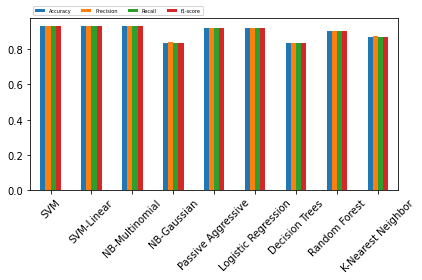

In [ ]:
#For graphical representation of performance of classifiers.
import matplotlib.pyplot as plt
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 5})
plt.tight_layout()

Super Spreader Analysis.

In [ ]:
pip install tweepy

In [1]:
import pandas as pd
import numpy as np
import tweepy

#authentication keys for using twitter api
#Please provide all the keys.(For security purpose keys are not provided.)
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)


#Tweet id's of different types of users.

fake_tweet_id = ["1252630938770649089","1243968198111789058",
"1242474839966765056","1242461115616866304","1242400142335983619",
"1238131052582928385","1254164579459854336","1256227600936177664",
"1256215023619395584","1256167023148765186","1256064242572300293",
"1256013502298370048","1255958833999933440","1255911880436178947",
"1255841759877349376","1255655200511033344","1255638434821083138",
"1255630129000099840","1255568949862957057","1448329324365484032",
"1298551702061228033","1458475230872014854","1458238546041470979",
"1392466469636612097","1458009811833036802","1459168716189483011"]



user_ID = []
user_NAME = []
no_of_FOLLOWERS = []
no_of_FOLLOWEES = []

for i in fake_tweet_id:
    
    try:
        
        tweets = api.get_status(i)
        user_ID.append(tweets.user.id_str) #for user id
        user_NAME.append(tweets.user.name) #for user name
        no_of_FOLLOWERS.append(tweets.user.followers_count) #for followers count
        no_of_FOLLOWEES.append(tweets.user.friends_count) #for friends count

    
    except tweepy.TweepError:
        
        pass






In [2]:
d = {"User Name":user_NAME,
    "No of Followers":no_of_FOLLOWERS,
    "No of friends":no_of_FOLLOWEES}

initial_df = pd.DataFrame(data=d)

#To calculate the folllowers to followee(friends) ratio
initial_df["followers to followee ratio"] =(initial_df["No of Followers"])/((initial_df["No of Followers"])+(initial_df["No of friends"]))
print(initial_df)

                  User Name  ...  followers to followee ratio
0             Mohima Akther  ...                     0.166667
1                Menstellar  ...                     0.333333
2             DoctorCare247  ...                     0.811609
3   SivaKumar S (Stay Safe)  ...                     0.957530
4        #WorldsBaitLeef 🇬🇾  ...                     0.507078
5                      Di K  ...                     0.248408
6                      Mr M  ...                     0.372340
7                 Uncle Nic  ...                     0.474039
8             Mashinani Man  ...                     0.384196
9                Alan Cohen  ...                     0.522690
10         Mendel Kalmenson  ...                     0.417874
11          Bonnie McDaniel  ...                     0.472564
12            Lori Atkinson  ...                     0.672783
13               Sunny Daze  ...                     0.143836
14           i hate it here  ...                     0.517986
15      

In [3]:
initial_df = initial_df.sort_values('User Name')
tweet_ids_of_user = []
    
for user_Id in user_ID:

    twEEt = api.user_timeline(user_id = user_Id,count = 10)#count is for no of latest tweets
    
    for k in twEEt:
        tweet_ids_of_user.append(k.id)

print(len(tweet_ids_of_user))

212


In [4]:
USER_NAME = []
TEXT = []
User_ID = []
for j in tweet_ids_of_user:
    try:

        tweets3 = api.get_status(j)
        User_ID.append(tweets3.user.id_str) #For user id
        USER_NAME.append(tweets3.user.name) #For user name
        TEXT.append(tweets3.text) #Text of latest tweets

    except tweepy.TweepError:
        
        pass


d3 = {"User Name":USER_NAME,
      "User ID":User_ID,
      "Tweet text:":TEXT}

text_df = pd.DataFrame(data=d3)
print(text_df)

text_df.to_csv("results_text.csv",index=False)  #Converting to csv file

result = ['[0]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[0]', '[0]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[0]', '[1]', '[1]', '[1]', '[0]', '[0]', '[0]', '[0]', 
'[1]', '[0]', '[1]', '[1]', '[0]', '[1]', '[0]', '[0]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[1]', '[1]', '[0]', '[0]', '[0]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[1]', '[1]', '[0]', '[0]', '[1]', '[0]', '[0]', '[0]', '[0]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[0]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[0]', '[0]', '[0]', '[0]', '[1]', '[1]', '[0]', '[1]', '[0]', 
'[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]']


                   User Name  ...                                        Tweet text:
0              Mohima Akther  ...  Can you tell fact from fiction?\n1. The immedi...
1              Mohima Akther  ...  @RANDCorporation @DrJaniceJ \n#factoverfiction...
2                 Menstellar  ...  @jsuryareddy67 Wtf? Why attack the consumer? W...
3                 Menstellar  ...  Making mistakes are part of being human❤️\n\n....
4                 Menstellar  ...  🚨 REMINDER: Cut out the toxic people, focus on...
..                       ...  ...                                                ...
207  University of Liverpool  ...  If you're keen to get your COVID-19 booster ja...
208  University of Liverpool  ...  RT @lpoolcouncil: #NEWS | @MayorLpool Joanne A...
209  University of Liverpool  ...  As we approach the winter break there are stil...
210  University of Liverpool  ...  It's official! Liverpool has been voted the 2n...
211  University of Liverpool  ...  RT @LivUniIT: Our Technical Se

In [5]:
no_of_likes = []
no_of_retweets = []
user_screen_name = []
user_name = []
no_of_tweets = []
no_of_followers = []
no_of_friends = []

for abcd in tweet_ids_of_user:
    #Data about individual tweets.
    try:
        
        tweets2 = api.get_status(abcd)
        no_of_likes.append(tweets2.favorite_count) #No of likes
        no_of_retweets.append(tweets2.retweet_count) #No of retweets
        user_screen_name.append(tweets2.user.screen_name) #User screen name
        user_name.append(tweets2.user.name) #User name
        no_of_tweets.append(tweets2.user.statuses_count) #Tweet count
        no_of_followers.append(tweets2.user.followers_count) #Follower count
        no_of_friends.append(tweets2.user.friends_count) #Friends count
    
    except tweepy.errors.TweepyException:
        
         pass


d1 = {"User Name":user_name,
    "User Screen Name":user_screen_name,
    "No of Tweets":no_of_tweets,
    "No of Followers":no_of_followers,
    "No of friends":no_of_friends,
    "No of likes":no_of_likes,
    "No of retweets":no_of_retweets}


#Visualization
final_df = pd.DataFrame(data=d1)


new_df = final_df[["User Name","No of retweets","No of likes"]]
# print(new_df)
new_df = new_df.groupby(['User Name']).sum()
#print(new_df)

rando = list(initial_df["followers to followee ratio"])
new_df["followers to followee ratio"] = rando

new_df = new_df.copy()

new_df["Retweet Ratio"] = ((new_df["No of retweets"])/((new_df["No of retweets"])+10))# 10 is no of tweets.
new_df["Likes Ratio"] = ((new_df["No of likes"])/((new_df["No of likes"])+10))



new_df["Influence_score"] = (new_df["followers to followee ratio"]+new_df["Retweet Ratio"]+new_df["Likes Ratio"])/3 #Calculation of influence score
#print(new_df)

sorted_df = new_df.sort_values(["Influence_score"], ascending=False)
print(sorted_df["Influence_score"])

User Name
Taylor Swift               0.999992
Cristiano Ronaldo          0.999979
Narendra Modi              0.999888
KATY PERRY                 0.999795
SpaceX                     0.999644
University of Liverpool    0.939186
SivaKumar S (Stay Safe)    0.938106
Lori Atkinson              0.646016
Uncle Nic                  0.622299
i hate it here             0.582805
Sunny Daze                 0.555523
#WorldsBaitLeef 🇬🇾         0.501396
DoctorCare247              0.474240
Mendel Kalmenson           0.423563
Alan Cohen                 0.388516
Mashinani Man              0.364177
Di K                       0.343486
Mr M                       0.312148
Jonny Rosemont             0.297658
Bonnie McDaniel            0.234445
Menstellar                 0.111111
Mohima Akther              0.085859
Name: Influence_score, dtype: float64


In [6]:
calculate_df = pd.read_csv('results_text.csv')
#Results are generated using Tf-idf and svm
result = ['[0]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[0]', '[0]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[0]', '[1]', '[1]', '[1]', '[0]', '[0]', '[0]', '[0]', 
'[1]', '[0]', '[1]', '[1]', '[0]', '[1]', '[0]', '[0]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[1]', '[1]', '[0]', '[0]', '[0]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[1]', '[1]', '[0]', '[0]', '[1]', '[0]', '[0]', '[0]', '[0]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[0]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[0]', '[0]', '[0]', '[0]', '[1]', '[1]', '[0]', '[1]', '[0]', 
'[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[0]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[1]', '[0]']

#print(len(result))
calculate_df["result"] = result
#print(calculate_df.head)

To find out how many tweets are fake for individual user.

In [7]:
new_calculate_df = calculate_df[['User Name','result']]
#new_calculate_df.head()
new_calculate_df1 = new_calculate_df.groupby(['User Name','result']).size().unstack(fill_value = 0)
print(new_calculate_df1)

result                   [0]  [1]
User Name                        
#WorldsBaitLeef 🇬🇾         0   10
Alan Cohen                 1    9
Bonnie McDaniel            2    8
Cristiano Ronaldo          2    8
Di K                       6    4
DoctorCare247              0   10
Jonny Rosemont             2    8
KATY PERRY                 3    7
Lori Atkinson              0   10
Mashinani Man              3    7
Mendel Kalmenson           6    4
Menstellar                 5    5
Mohima Akther              1    1
Mr M                       5    5
Narendra Modi              5    5
SivaKumar S (Stay Safe)    0   10
SpaceX                     3    7
Sunny Daze                 6    4
Taylor Swift               3    7
Uncle Nic                  2    8
University of Liverpool    1    9
i hate it here             4    6


In [8]:
new_calculate_df1 = new_calculate_df1[new_calculate_df1[result[0]] > 5] #If more than 5 tweets are fake then user might be a superspreader.

superspreader_name_df = pd.DataFrame(new_calculate_df1["[0]"].index.get_level_values('User Name').tolist(),columns = ["User Name"])

#print(superspreader_name_df)

superspreader_name_df


,User Name
0,Di K
1,Mendel Kalmenson
2,Sunny Daze


In [9]:
# Scores of all the ratios for superspreader.
sorted_df.merge(superspreader_name_df, how='inner', on='User Name')

,User Name,No of retweets,No of likes,followers to followee ratio,Retweet Ratio,Likes Ratio,Influence_score
0,Sunny Daze,9276,11,0.143836,0.998923,0.523810,0.555523
1,Mendel Kalmenson,1,32,0.417874,0.090909,0.761905,0.423563
2,Di K,2,16,0.248408,0.166667,0.615385,0.343486
